# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Nabila Febriyanti Valentin
- Email: nabilafebriyantivalentin272@gmail.com
- Id Dicoding: nfvalen02

## Persiapan

### Menyiapkan library yang dibutuhkan

In [72]:
import pandas as pd
import seaborn as sns
import math
import shap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.svm import SVC
from xgboost import XGBClassifier

### Menyiapkan data yang akan diguankan

In [73]:
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"

df = pd.read_csv(url, delimiter=';')

## Data Understanding

**Tampilkan 5 Baris Pertama**


In [74]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**Info Dataset**

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

**Statistik Deskriptif**

In [76]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


**Cek Missing Values**

In [77]:
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


**Cek Duplikasi Dataset**

In [78]:
print("Jumlah Duplikasi Data :", df.duplicated().sum())

Jumlah Duplikasi Data : 0


**Cek Nilai Unik Per Kolom**


In [79]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} nilai unik - Contoh: {df[col].unique()[:5]}")

Marital_status: 6 nilai unik - Contoh: [1 2 4 3 5]
Application_mode: 18 nilai unik - Contoh: [17 15  1 39 18]
Application_order: 8 nilai unik - Contoh: [5 1 2 4 3]
Course: 17 nilai unik - Contoh: [ 171 9254 9070 9773 8014]
Daytime_evening_attendance: 2 nilai unik - Contoh: [1 0]
Previous_qualification: 17 nilai unik - Contoh: [ 1 19 42 39 10]
Previous_qualification_grade: 101 nilai unik - Contoh: [122.  160.  100.  133.1 142. ]
Nacionality: 21 nilai unik - Contoh: [ 1 62  6 41 26]
Mothers_qualification: 29 nilai unik - Contoh: [19  1 37 38  3]
Fathers_qualification: 34 nilai unik - Contoh: [12  3 37 38  1]
Mothers_occupation: 32 nilai unik - Contoh: [5 3 9 7 4]
Fathers_occupation: 46 nilai unik - Contoh: [ 9  3  7 10  5]
Admission_grade: 620 nilai unik - Contoh: [127.3 142.5 124.8 119.6 141.5]
Displaced: 2 nilai unik - Contoh: [1 0]
Educational_special_needs: 2 nilai unik - Contoh: [0 1]
Debtor: 2 nilai unik - Contoh: [0 1]
Tuition_fees_up_to_date: 2 nilai unik - Contoh: [1 0]
Gender: 

**Ringkasan Dataset:**
- Pada dataset ini terdapat 4424 baris dan 37 kolom.
- Tidak terdapat missing values dan duplikasi data
- Tipe data yang dimiliki dataset jaya jaya maju institut yaitu numerik (int64 dan float64) dan kategorikal (object).

**Visualisasi Distribusi Target (Status)**

In [80]:
status_counts = df['Status'].value_counts()
status_counts

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


In [81]:
status_percent = df['Status'].value_counts(normalize=True)*100
status_percent

,proportion
Status,
Graduate,49.932188
Dropout,32.120253
Enrolled,17.947559


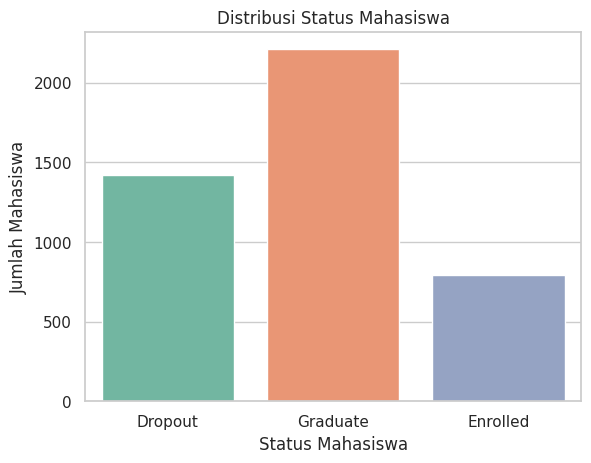

In [82]:
sns.countplot(data=df, x='Status', hue= 'Status', palette='Set2', legend=False)
plt.title('Distribusi Status Mahasiswa')
plt.xlabel('Status Mahasiswa')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

**Ringkasan Status :**
- Dropout: 32.12%
- Graduate: 49.93%
- Enrolled: 17.94%

**Kesimpulan :** Sebagian mahasiswa sudah graduate, namun yang terkena dropout memiliki persentase yang cukup tinggi pada 32.12%.

<ipython-input-83-fb20780ee608>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Admission_grade', data=df, palette='Set3')


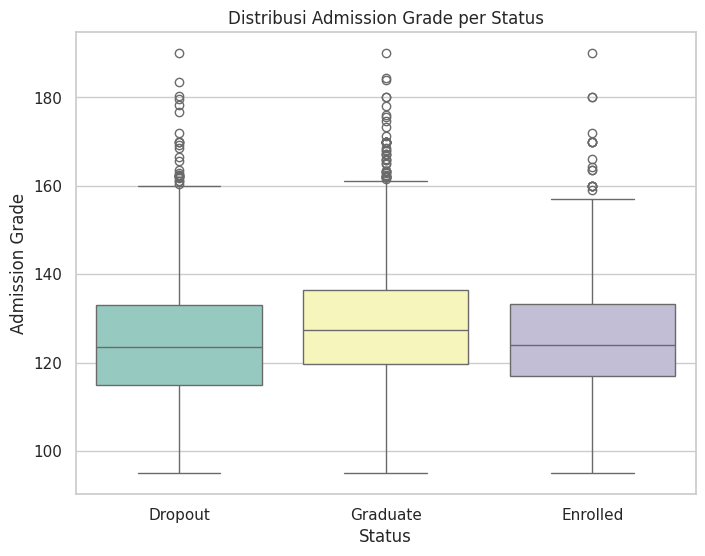

In [83]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Admission_grade', data=df, palette='Set3')
plt.title('Distribusi Admission Grade per Status')
plt.xlabel('Status')
plt.ylabel('Admission Grade')
plt.show()

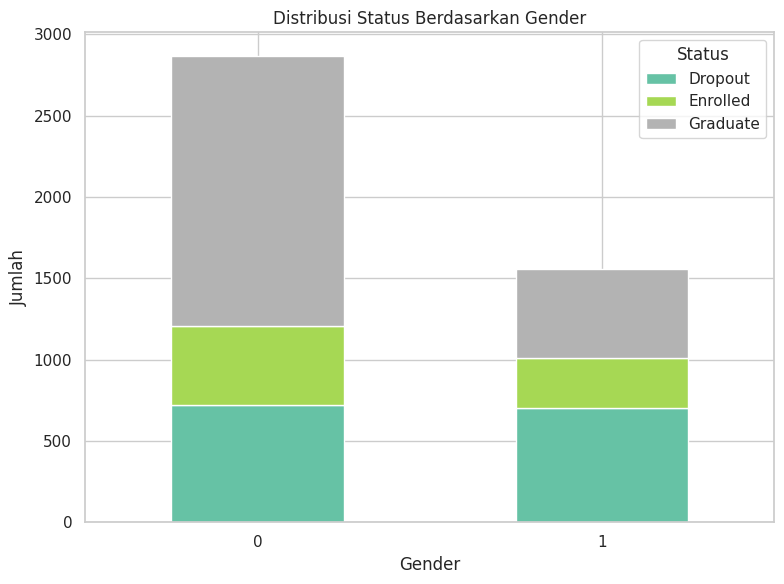

In [84]:
cross_tab = pd.crosstab(df['Gender'], df['Status'])
cross_tab.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Set2')
plt.title('Distribusi Status Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

**Visualisasi Distribusi Fitur Numerik**

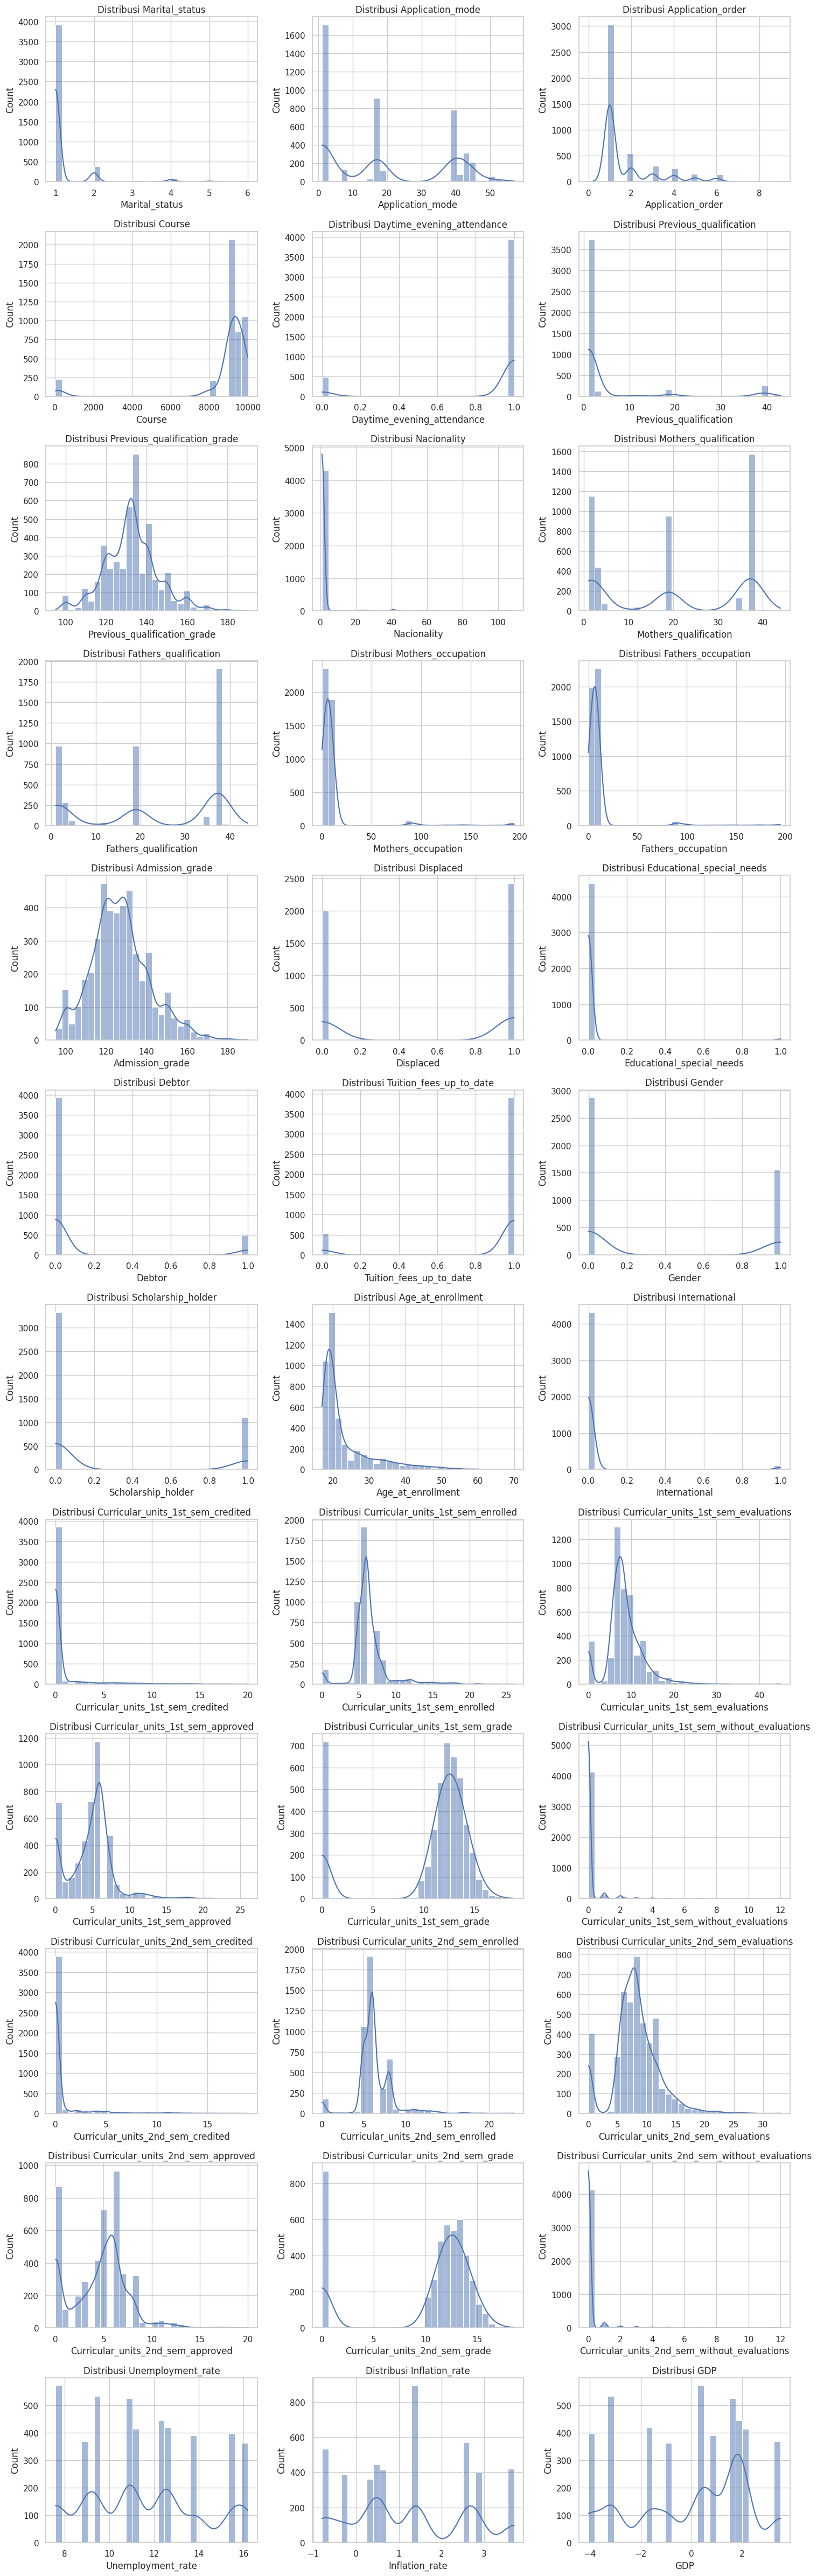

In [85]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

n_features = len(numerical_features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

**Boxplot Fitur Numerik Vs Status**

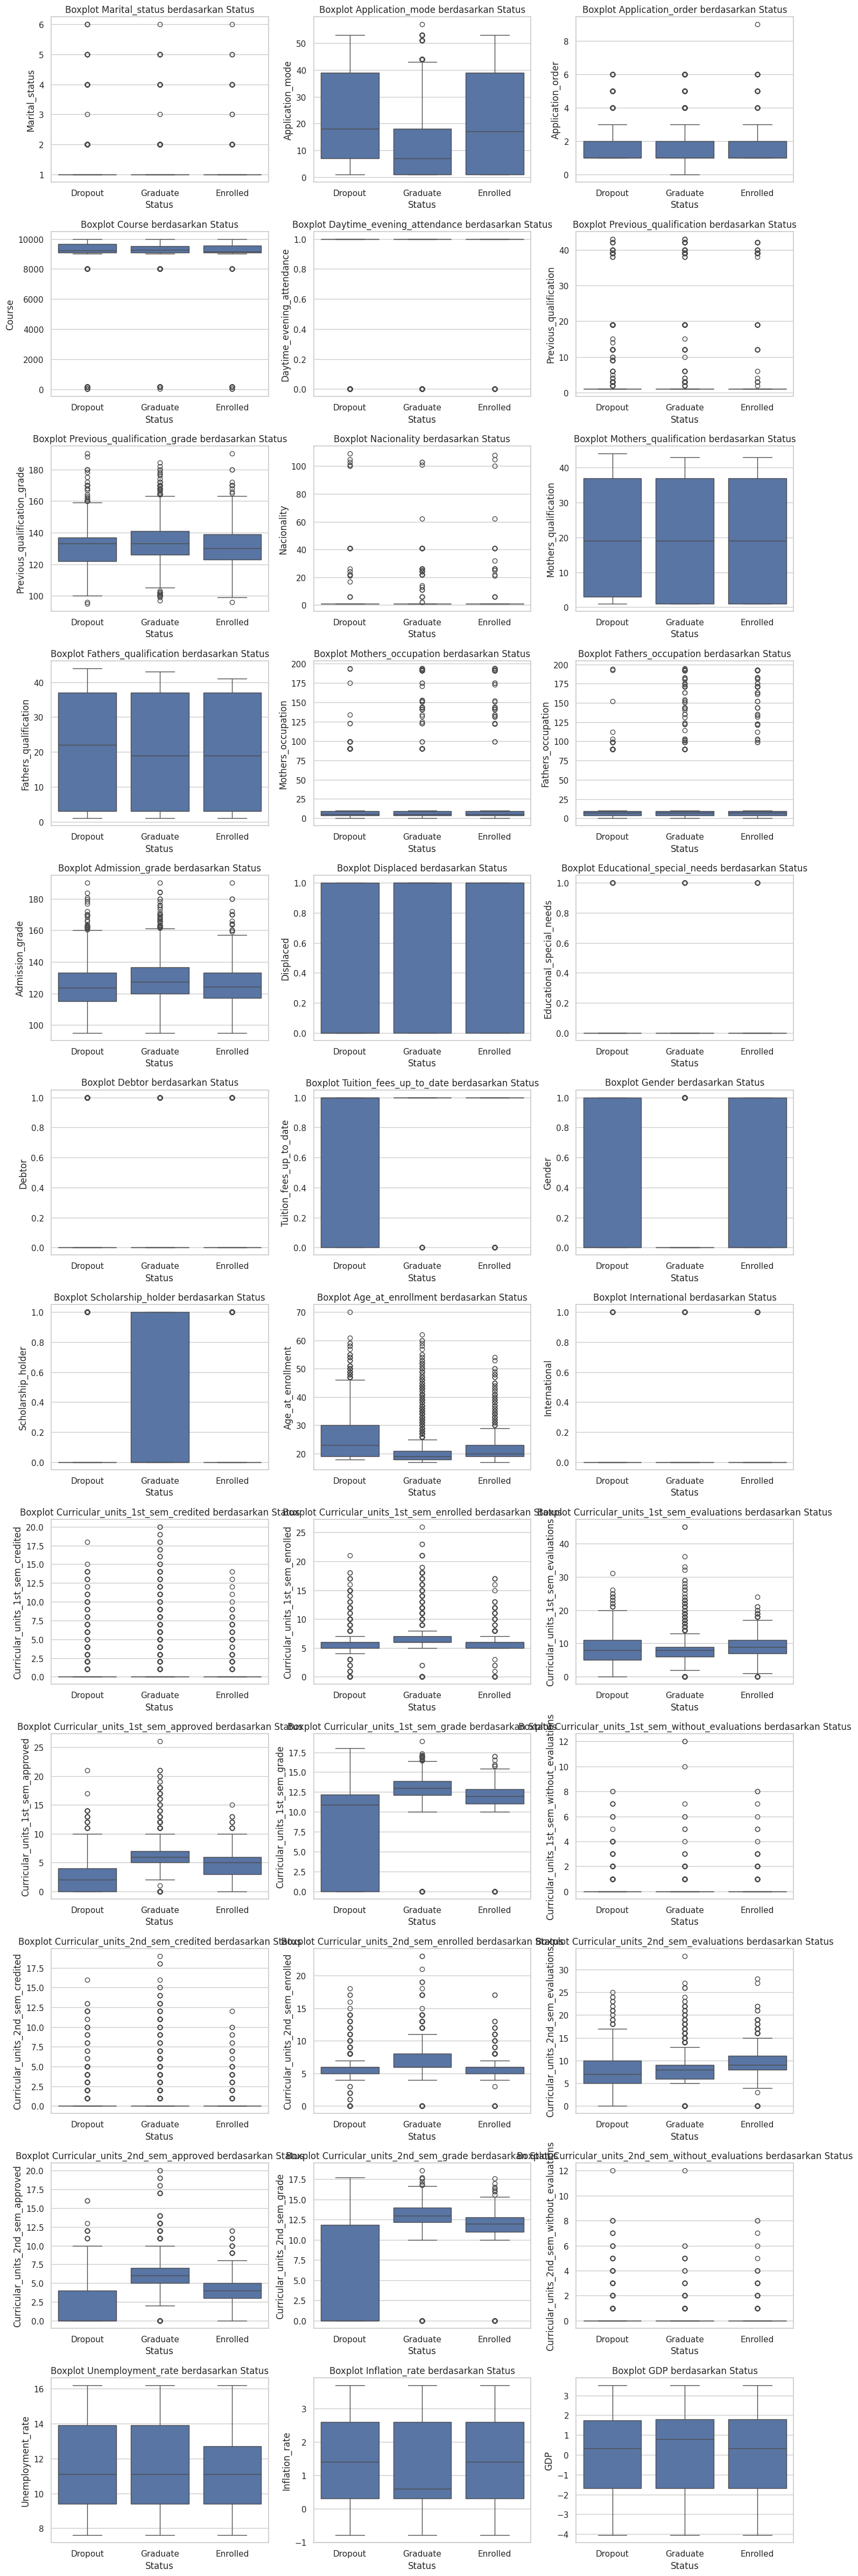

In [86]:
n_features = len(numerical_features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='Status', y=col, data=df)
    plt.title(f'Boxplot {col} berdasarkan Status')

plt.tight_layout()
plt.show()

**Visualisasi Fitur Kategorikal Utama dan Proporsi Status**

In [87]:
categorical_cols = [col for col in df.columns
                    if df[col].nunique() < 20 and col != 'Status']

print("Fitur kategorikal yang terdeteksi:", categorical_cols)

Fitur kategorikal yang terdeteksi: ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']


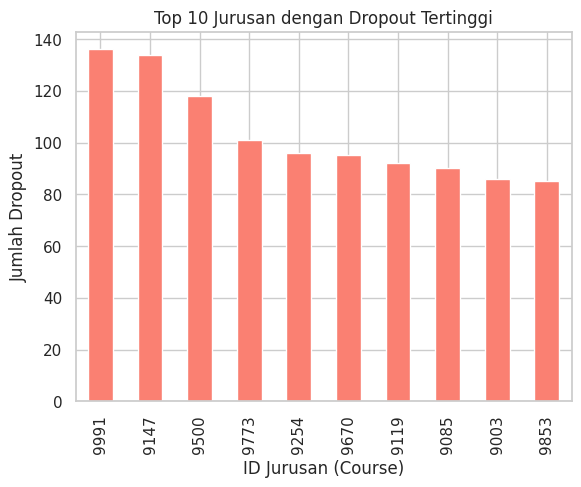

In [88]:
dropout_by_course = df[df['Status'] == 'Dropout'].groupby('Course').size().sort_values(ascending=False)
dropout_by_course.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Jurusan dengan Dropout Tertinggi')
plt.xlabel('ID Jurusan (Course)')
plt.ylabel('Jumlah Dropout')
plt.show()

<ipython-input-89-067c9001c029>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y='Previous_qualification_grade', palette='Pastel1')


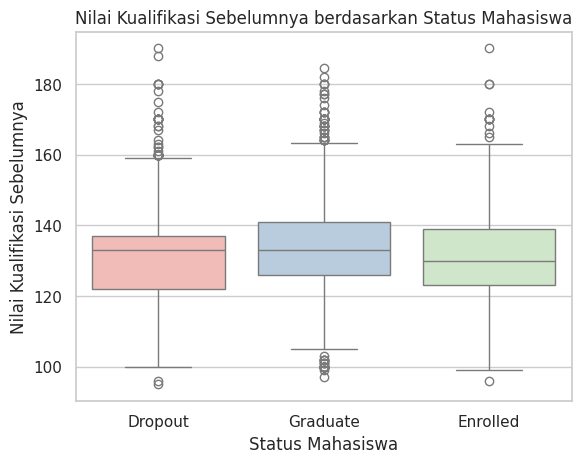

In [89]:
sns.boxplot(data=df, x='Status', y='Previous_qualification_grade', palette='Pastel1')
plt.title('Nilai Kualifikasi Sebelumnya berdasarkan Status Mahasiswa')
plt.xlabel('Status Mahasiswa')
plt.ylabel('Nilai Kualifikasi Sebelumnya')
plt.show()

<ipython-input-90-559ce0adabff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y='Mothers_qualification', palette='Blues', ax=axes[0])
<ipython-input-90-559ce0adabff>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y='Fathers_qualification', palette='Greens', ax=axes[1])


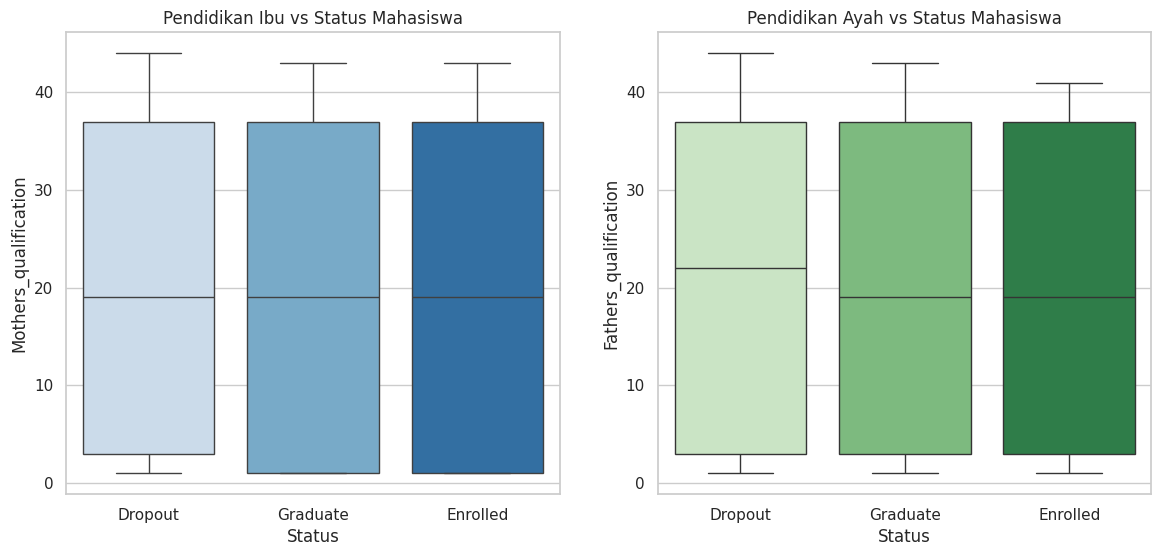

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.boxplot(data=df, x='Status', y='Mothers_qualification', palette='Blues', ax=axes[0])
axes[0].set_title('Pendidikan Ibu vs Status Mahasiswa')

sns.boxplot(data=df, x='Status', y='Fathers_qualification', palette='Greens', ax=axes[1])
axes[1].set_title('Pendidikan Ayah vs Status Mahasiswa')

plt.show()

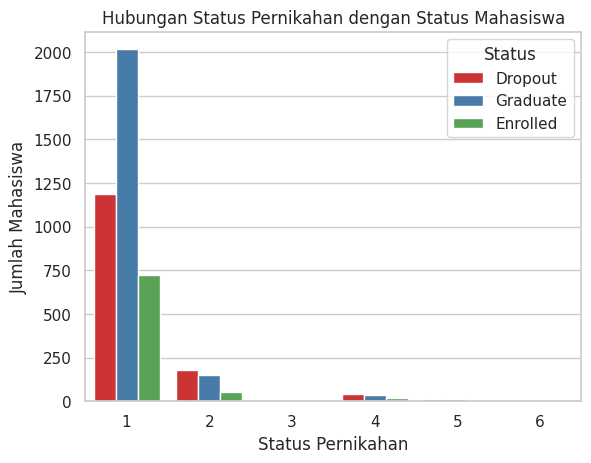

In [91]:
sns.countplot(data=df, x='Marital_status', hue='Status', palette='Set1')
plt.title('Hubungan Status Pernikahan dengan Status Mahasiswa')
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

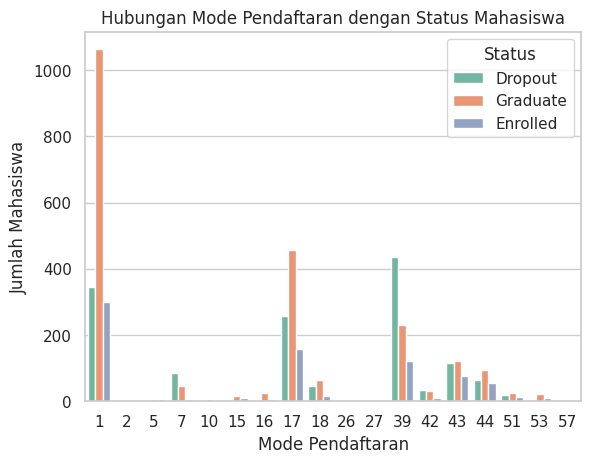

In [92]:
sns.countplot(data=df, x='Application_mode', hue='Status', palette='Set2')
plt.title('Hubungan Mode Pendaftaran dengan Status Mahasiswa')
plt.xlabel('Mode Pendaftaran')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

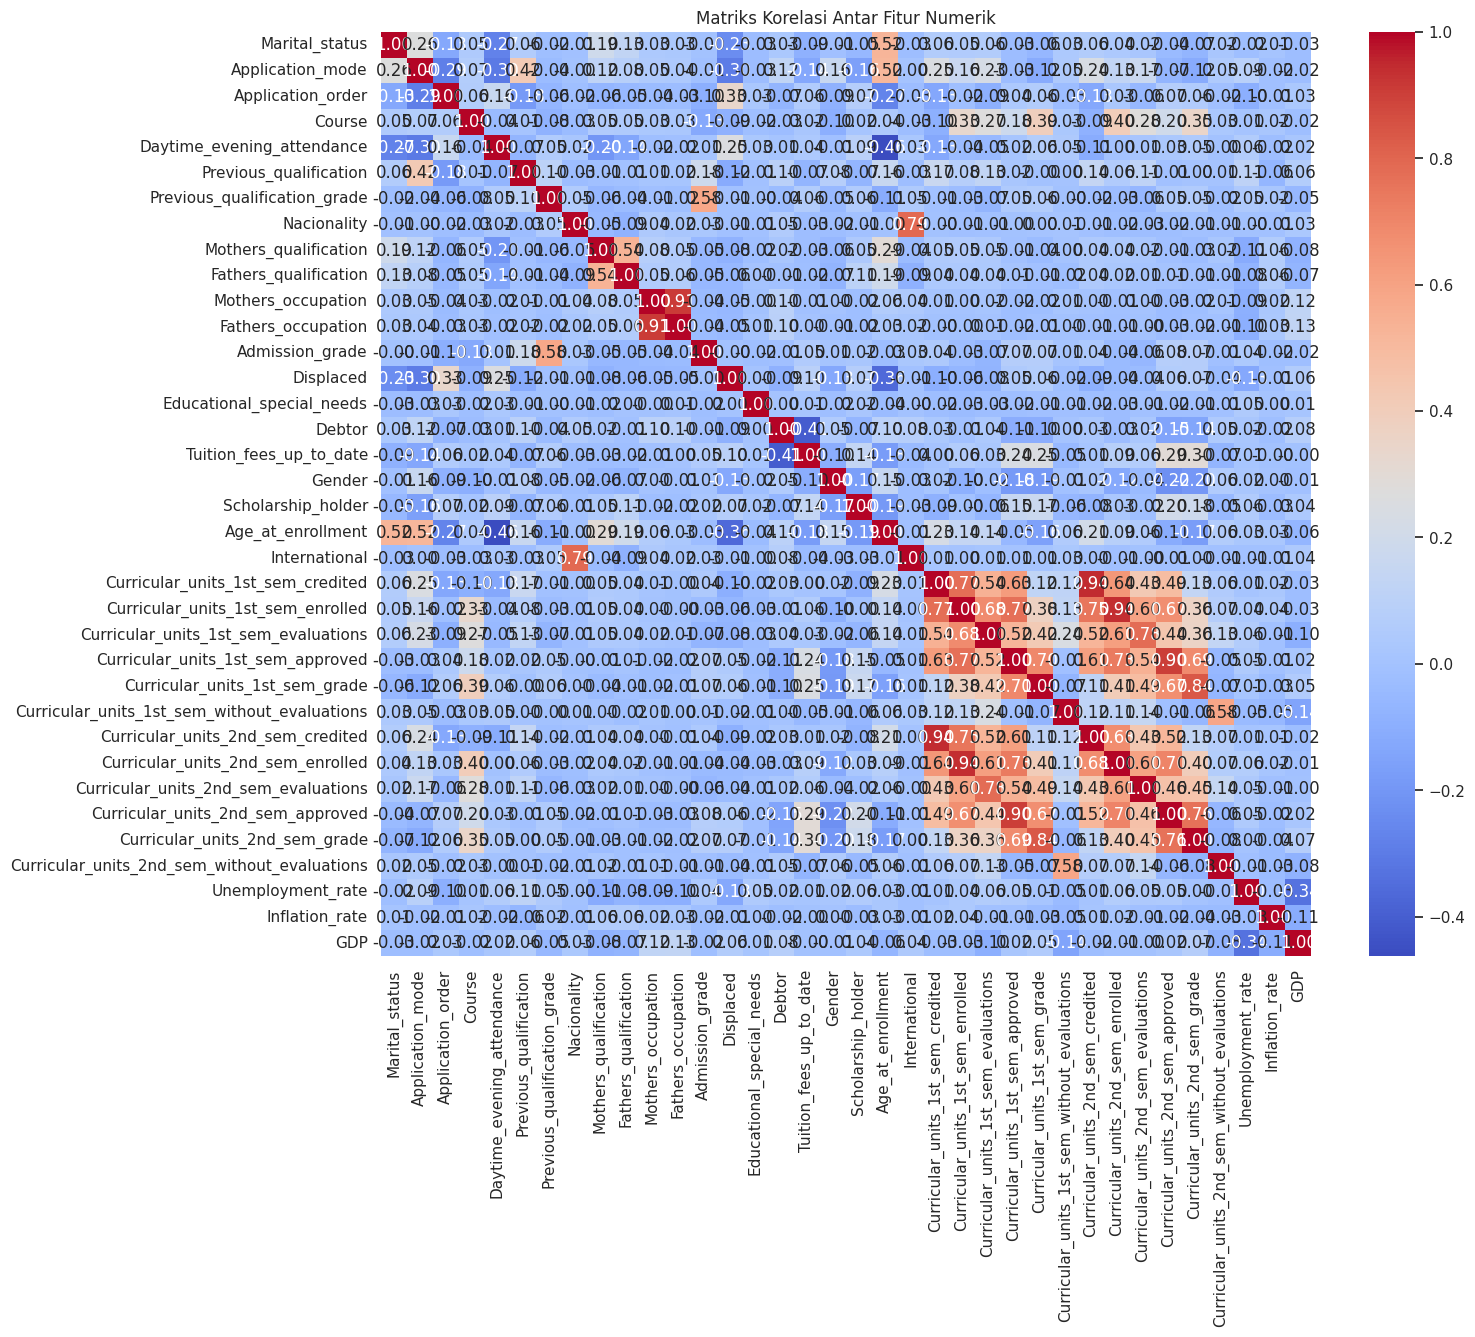

In [93]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi Antar Fitur Numerik')
plt.show()

## Data Preparation / Preprocessing

**Menangani Missing Values**

In [94]:
# Menghapus missing values
df_clean = df.dropna()

**Encoding Fitur Kategorikal**

In [95]:
df_new = df_clean.copy()
label_encoder = LabelEncoder()
df_new['Status'] = label_encoder.fit_transform(df_new['Status'])

df_new.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


**Menangani Duplikasi Dataset**

In [96]:
df_new = df_new.drop_duplicates()

**Mapping Gender pada DataFrame**



In [97]:
gender_map = {0: 'Female', 1: 'Male'}
df_clean['Gender'] = df_clean['Gender'].map(gender_map)

**Mapping Marital_Status pada DataFrame**

In [98]:
marital_status_map = {
    1: 'Single',
    2: 'Married',
    3: 'Divorced',
    4: 'Widowed',
    5: 'Separated',
    6: 'In a relationship'
}
df_clean['Marital_status'] = df_clean['Marital_status'].map(marital_status_map)

**Mapping Course pada DataFrame**

In [99]:
course_map = {
    33: 'Computer Science',
    171: 'Nursing',
    8014: 'Business Management',
    9003: 'Law',
    9070: 'Psychology',
    9991: 'Veterinary Nursing',
    9085: 'Social Service',
    9119: 'Tourism',
    9130: 'Communication Design',
    9147: 'Marketing',
    9238: 'Journalism and Communication',
    9254: 'Basic Education',
    9500: 'Management',
    9556: 'Accounting',
    9670: 'Solicitor',
    9773: 'Management (Evening)',
    9853: 'Social Work (Evening)'
}
df_clean['Course'] = df_clean['Course'].map(course_map)

**Split Data X dan y**

In [100]:
X = df_new.drop('Status', axis=1)
y = df_new['Status']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

**Menerapkan balancing data menggunakan SMOTE**

In [102]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [103]:
print(f"Ukuran data training: {X_train.shape}")
print(f"Ukuran data testing: {X_test.shape}")

Ukuran data training: (3539, 36)
Ukuran data testing: (885, 36)


## Modeling

**Model Random Forest**

In [104]:
model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_train_smote, y_train_smote)
y_pred_rf = model_RF.predict(X_test)

**Model Logistic Regression**

In [105]:
model_log = LogisticRegression(solver='sag', max_iter=5000)
model_log.fit(X_train, y_train)

y_pred_log = model_log.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**Model XGBoost**

In [106]:
model_xgb = XGBClassifier(random_state=42, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

## Evaluation

In [107]:
print("=== Random Forest ===")

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

=== Random Forest ===

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77       284
           1       0.48      0.55      0.51       159
           2       0.83      0.86      0.84       442

    accuracy                           0.76       885
   macro avg       0.71      0.71      0.71       885
weighted avg       0.77      0.76      0.76       885

Accuracy: 0.7570621468926554


In [108]:
print("=== Logistic Regression ===")

print(classification_report(y_test, y_pred_log, zero_division=1))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       284
           1       0.52      0.19      0.28       159
           2       0.73      0.95      0.83       442

    accuracy                           0.74       885
   macro avg       0.68      0.62      0.62       885
weighted avg       0.71      0.74      0.70       885

Accuracy: 0.735593220338983


In [109]:
print("=== XGBoost ===")

print("\nClassification Report: XGBoost")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

=== XGBoost ===

Classification Report: XGBoost
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       284
           1       0.51      0.45      0.48       159
           2       0.82      0.90      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.70      0.70       885
weighted avg       0.76      0.77      0.76       885

Accuracy: 0.7672316384180791


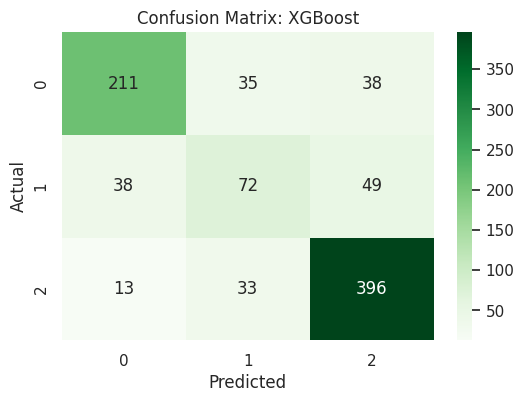

In [110]:
xgb_confusion_matrix = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(xgb_confusion_matrix, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix: XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [111]:
results = {}

# Random Forest
rf_report = classification_report(y_test, y_pred_rf, output_dict=True, zero_division=1)
results['Random Forest'] = {
    'Precision': rf_report['weighted avg']['precision'],
    'Recall': rf_report['weighted avg']['recall'],
    'F1-Score': rf_report['weighted avg']['f1-score'],
    'Accuracy': accuracy_score(y_test, y_pred_rf)
}

# Logistic Regression
log_report = classification_report(y_test, y_pred_log, output_dict=True, zero_division=1)
results['Logistic Regression'] = {
    'Precision': log_report['weighted avg']['precision'],
    'Recall': log_report['weighted avg']['recall'],
    'F1-Score': log_report['weighted avg']['f1-score'],
    'Accuracy': accuracy_score(y_test, y_pred_log)
}

# XGBoost
xgb_report = classification_report(y_test, y_pred_xgb, output_dict=True, zero_division=1)
results['XGBoost'] = {
    'Precision': xgb_report['weighted avg']['precision'],
    'Recall': xgb_report['weighted avg']['recall'],
    'F1-Score': xgb_report['weighted avg']['f1-score'],
    'Accuracy': accuracy_score(y_test, y_pred_xgb)
}

# Tampilkan sebagai DataFrame
df_results = pd.DataFrame(results).T
print(df_results)

                     Precision    Recall  F1-Score  Accuracy
Random Forest         0.767701  0.757062  0.760138  0.757062
Logistic Regression   0.712950  0.735593  0.702785  0.735593
XGBoost               0.760310  0.767232  0.762175  0.767232


In [112]:
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test)

<Figure size 640x480 with 0 Axes>

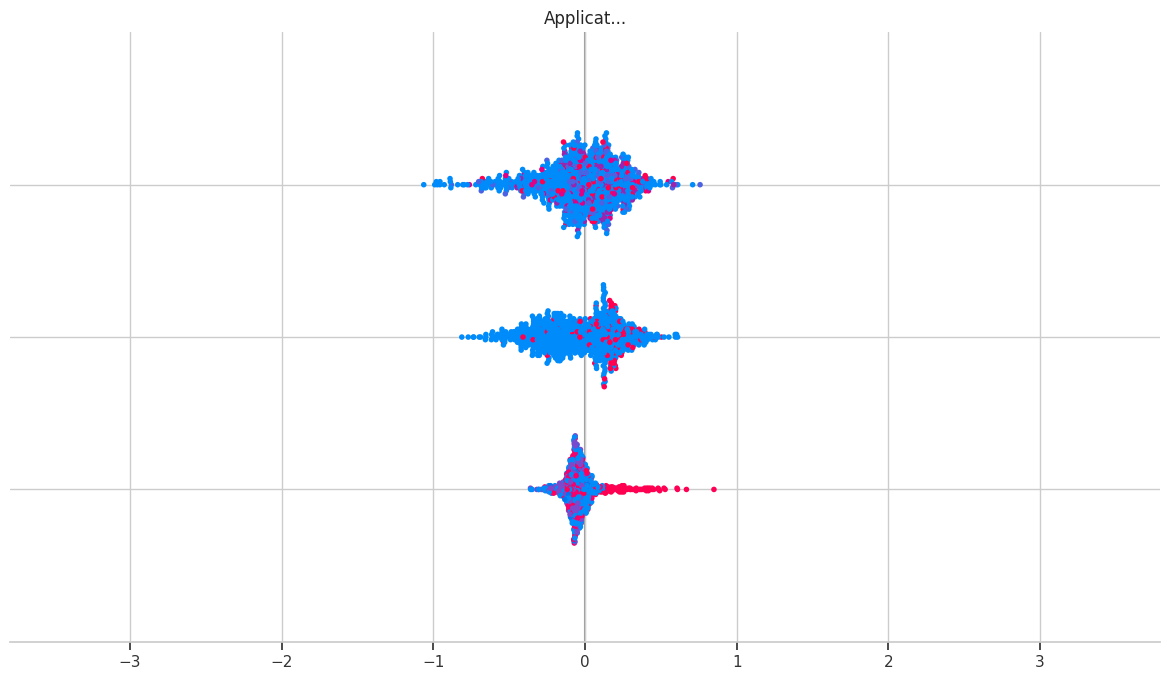

In [113]:
shap.summary_plot(shap_values, X_test)

**Interpretation**

In [114]:
feature_importance_df = pd.DataFrame({
    'Fitur': X.columns,
    'Importance': model_RF.feature_importances_
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(feature_importance_df)

                                           Fitur  Importance
0              Curricular_units_2nd_sem_approved    0.121881
1                 Curricular_units_2nd_sem_grade    0.112504
2              Curricular_units_1st_sem_approved    0.075810
3                 Curricular_units_1st_sem_grade    0.057385
4                        Tuition_fees_up_to_date    0.046700
5           Curricular_units_2nd_sem_evaluations    0.041855
6                                Admission_grade    0.040295
7                   Previous_qualification_grade    0.038406
8                              Age_at_enrollment    0.034449
9                                         Course    0.033129
10          Curricular_units_1st_sem_evaluations    0.033021
11                            Fathers_occupation    0.030544
12                                           GDP    0.030331
13                             Unemployment_rate    0.030131
14                            Mothers_occupation    0.029359
15                      

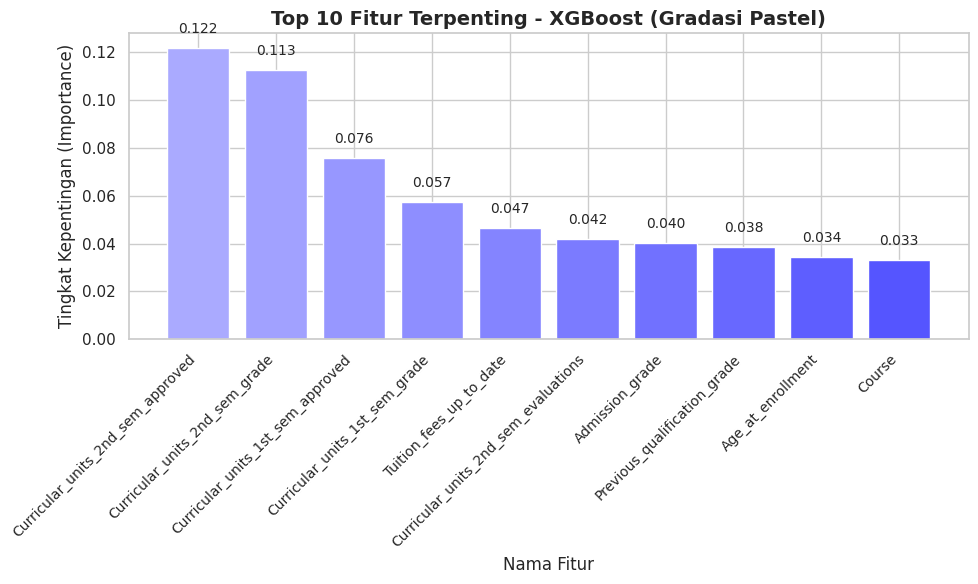

In [115]:
sns.set_theme(style="whitegrid")

# Ambil 10 fitur teratas
top_features = feature_importance_df.head(10)

colors = sns.color_palette("blend:#aaf,#55f", n_colors=len(top_features))

plt.figure(figsize=(10, 6))
bars = plt.bar(top_features['Fitur'], top_features['Importance'], color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.005,
             f'{height:.3f}', ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Fitur Terpenting - XGBoost (Gradasi Pastel)', fontsize=14, fontweight='bold')
plt.xlabel('Nama Fitur', fontsize=12)
plt.ylabel('Tingkat Kepentingan (Importance)', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

Berikut adalah versi **kesimpulan dan insight** yang telah **disesuaikan** dengan isi dataset dan hasil penting dari model prediktif yang kamu tampilkan (terutama fitur penting dari model Random Forest):

---

## 📌 Conclusion

Proyek analisis ini bertujuan untuk memahami faktor-faktor utama yang memengaruhi keberlanjutan studi mahasiswa di **Jaya Jaya Institute**. Dengan memanfaatkan data akademik, demografis, dan sosial ekonomi mahasiswa, serta membangun model prediktif berbasis machine learning, diperoleh berbagai insight yang dapat mendukung pengambilan keputusan strategis dalam manajemen pendidikan.

---

## 💡 Insight Kunci dari Analisis Data

### 🎓 Performa Akademik Sangat Menentukan

Fitur-fitur akademik seperti:

* `Curricular_units_2nd_sem_approved` (nilai tertinggi dalam importance),
* `Curricular_units_2nd_sem_grade`, dan
* `Curricular_units_1st_sem_approved`
  menjadi **penentu utama** keberhasilan mahasiswa bertahan atau tidak di institusi. Mahasiswa dengan **sedikit mata kuliah yang lulus** atau **nilai rendah** memiliki risiko lebih tinggi untuk keluar.

### 💸 Faktor Finansial Juga Berpengaruh

Fitur `Tuition_fees_up_to_date` termasuk dalam 5 besar fitur terpenting. Artinya, mahasiswa yang **tidak membayar uang kuliah tepat waktu** cenderung mengalami masalah keberlanjutan studi.

### 📈 Evaluasi Semester dan Riwayat Akademik Memprediksi Risiko

Jumlah evaluasi (`Curricular_units_2nd_sem_evaluations`) dan nilai masuk (`Admission_grade`) juga menunjukkan pengaruh signifikan. Mahasiswa dengan **riwayat akademik awal yang lemah** lebih rentan putus studi.

### 👨‍👩‍👧 Latar Belakang Sosial dan Ekonomi

* Fitur seperti `Fathers_occupation`, `Mothers_occupation`, dan `Scholarship_holder` menunjukkan pengaruh cukup kuat.
* Mahasiswa dari **latar belakang orang tua dengan pekerjaan tidak tetap** atau tanpa beasiswa memiliki kecenderungan lebih tinggi untuk keluar dari institusi.

### 📉 Faktor Demografis Kurang Dominan

Fitur seperti `Gender`, `Marital_status`, dan `Nacionality` memiliki importance yang rendah. Artinya, **faktor demografis bukanlah penentu utama** dalam attrition mahasiswa di institusi ini.

---

## 📈 Model Prediktif Terbaik

Model terbaik dalam proyek ini adalah **XGBoost**. Berdasarkan evaluasi, model ini memiliki performa sangat baik dalam mengklasifikasikan mahasiswa yang berisiko keluar:

* **Accuracy**: 76.72%
* **Precision**: 76.03%
* **Recall**: 76.72%
* **F1-Score**: 76.21%

---

## 🎯 Jawaban terhadap Pertanyaan Strategis

* **Apa faktor utama yang memengaruhi attrition mahasiswa?**
  ✅ Jumlah mata kuliah yang lulus, nilai semester 2, keterlambatan pembayaran uang kuliah.

* **Apakah faktor sosial ekonomi berpengaruh?**
  ✅ Ya, mahasiswa tanpa beasiswa atau dari keluarga dengan pekerjaan tidak tetap lebih rentan keluar.

* **Apakah kita bisa mengidentifikasi mahasiswa berisiko tinggi?**
  ✅ Bisa. Terutama jika mereka memiliki nilai rendah, tidak lulus banyak mata kuliah, dan tidak membayar biaya kuliah tepat waktu.

---

## ✅ Rekomendasi Strategis untuk Jaya Jaya Institute

* **Intervensi Akademik Awal**
  Pantau mahasiswa dengan performa semester awal yang rendah untuk diberikan bimbingan atau dukungan belajar.

* **Program Dukungan Finansial**
  Tingkatkan akses ke beasiswa atau skema keringanan biaya untuk mahasiswa yang mengalami kesulitan membayar.

* **Pemantauan Berbasis Dashboard**
  Bangun sistem pemantauan real-time berbasis data untuk mendeteksi potensi attrition lebih awal dan melakukan intervensi cepat.

* **Kolaborasi Orang Tua dan Wali**
  Libatkan keluarga dalam proses akademik mahasiswa, terutama yang berasal dari latar belakang pekerjaan informal.

---

## 🧩 Kesimpulan Akhir

Attrition di Jaya Jaya Institute bukanlah peristiwa acak. Melalui pendekatan data-driven ini, institusi dapat secara **proaktif mengenali pola risiko**, melakukan **intervensi terarah**, dan pada akhirnya **meningkatkan keberhasilan akademik dan retensi mahasiswa**.


In [116]:
df_clean.to_csv("students.csv", index=False)

In [117]:
from google.colab import files
files.download("students.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [120]:
feature_importance_df.to_csv("important.csv", index=False)
from google.colab import files
files.download("important.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [121]:
!pip freeze > requirements.txt

In [123]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [122]:
dump(model_xgb, 'model.joblib')

['model.joblib']

In [124]:
from google.colab import files
files.download('model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>